In [1]:
import re
import os
from os import path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ieee')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager

In [2]:
folder_type = "discrete"
dataset = "make_circles_3"
filename= "bins10_epochs1000_arch5_lr0.1.csv"
root_path = path.dirname(os.getcwd())
filepath = path.join(root_path, "results", folder_type, dataset, filename)

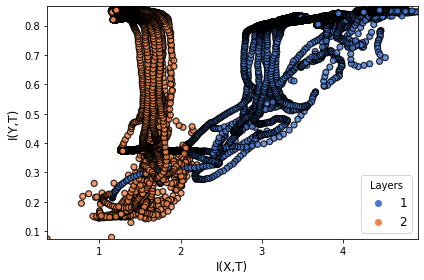

In [3]:
df = pd.read_csv(filepath)
df = df.rename(columns ={"Y":"I(Y,T)", "T":"I(X,T)"})
xmax, xmin = df["I(X,T)"].max(), df["I(X,T)"].min() 
ymax, ymin = df["I(Y,T)"].max(), df["I(Y,T)"].min() 
epoch = 0

fig, ax = plt.subplots(figsize = (6,4))

g = sns.scatterplot(data=df, 
                    x='I(X,T)', 
                    y="I(Y,T)", 
                    hue="layer",
                    alpha=0.8,
                    edgecolor="black",
                    palette="muted",
                    linewidth=1.2,
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    ax=ax)


def set_scatterplot_legend(ax, epoch):

    g.set_xlabel("I(X,T)", fontsize=12)
    g.set_ylabel("I(Y,T)", fontsize=12)

    leg = ax.legend(loc='lower right', 
                    title='Layers',
                    fontsize=12)
    # make opaque legend
    for lh in leg.legendHandles:
        fc_arr = lh.get_fc().copy()
        fc_arr[:, -1] = 1
        lh.set_fc(fc_arr)
        lh.set_alpha(1)

    return leg

leg = set_scatterplot_legend(g,epoch)

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.tight_layout()
plt.show()

AttributeError: 'Line2D' object has no property 'norm'

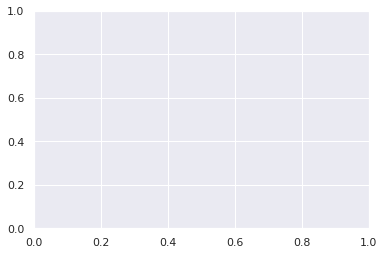

In [69]:
from matplotlib.colors import LogNorm

mi, ma = df["epoch"].min(), df["epoch"].max()
lognorm =LogNorm(vmin=mi, vmax=ma)

sns.lineplot(
    data=df.query("rand_init == 11"),
    x="I(X,T)", 
    y="I(Y,T)", 
    hue="epoch", 
    estimator=None, 
    marker="o",
    palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),
    legend=None,
)


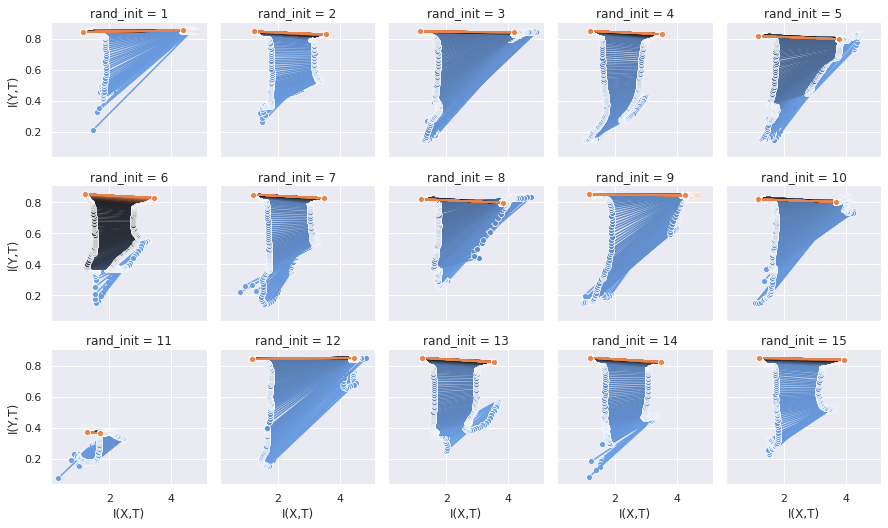

In [64]:
g = sns.FacetGrid(df, col="rand_init", height=2.5, col_wrap=5)
g.map_dataframe(sns.lineplot, 
                x="I(X,T)", 
                y="I(Y,T)",
                hue="epoch", 
                estimator=None, 
                marker="o",
                palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),
                legend=None)
